<a href="https://colab.research.google.com/github/Ankitatiwary21/Hackbtech/blob/main/TWITTER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud

%matplotlib inline

# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

df.head()


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df. shape


df['label'].value_counts()



,count
label,
0,29720
1,2242


In [ ]:
def clean_tweets(input_tweet):
    # Remove user handles - starting from @User
    clean_tweet = re.sub("@[\w]*", "", input_tweet)
    # Remove special characters except # as it is used in hashtags
    clean_tweet = re.sub("[^a-zA-Z#]", " ", clean_tweet)
    clean_tweet = clean_tweet.lower()

    stop_words = stopwords.words('english')
    Tweet_Tokenizer = TweetTokenizer()
    stemmer = PorterStemmer()

    # tokenize the tweet
    tweet_tokens = Tweet_Tokenizer.tokenize(clean_tweet)

    #Remove stop words
    tweet_tokens = [i for i in tweet_tokens if i not in stop_words]
    # Remove short words - length less than 3 such as ok, oh, etc.
    tweet_tokens = [i for i in tweet_tokens if len(i) > 3]

    # perform stemming
    tweet_tokens = [i if i.startswith("#") else stemmer.stem(i) for i in tweet_tokens]

    return " ".join(tweet_tokens)

df['clean_tweet'] = df['tweet'].apply(lambda i : clean_tweets(i))

df.head()


NameError: name 'stopwords' is not defined

In [ ]:
# Import Required Libraries
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from wordcloud import WordCloud

# Import stopwords, TweetTokenizer, PorterStemmer
from nltk.corpus import stopwords # Import the stopwords object from nltk.corpus
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer

# Download necessary NLTK data if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

# Read the dataset
df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')

df.head()


def clean_tweets(input_tweet):
    # Remove user handles - starting from @User
    clean_tweet = re.sub("@[\w]*", "", input_tweet)
    # Remove special characters except # as it is used in hashtags
    clean_tweet = re.sub("[^a-zA-Z#]", " ", clean_tweet)
    clean_tweet = clean_tweet.lower()

    # stop_words is now defined because of the import statement above
    stop_words = stopwords.words('english')
    Tweet_Tokenizer = TweetTokenizer()
    stemmer = PorterStemmer()

    # tokenize the tweet
    tweet_tokens = Tweet_Tokenizer.tokenize(clean_tweet)

    #Remove stop words
    tweet_tokens = [i for i in tweet_tokens if i not in stop_words]
    # Remove short words - length less than 3 such as ok, oh, etc.
    tweet_tokens = [i for i in tweet_tokens if len(i) > 3]

    # perform stemming
    tweet_tokens = [i if i.startswith("#") else stemmer.stem(i) for i in tweet_tokens]

    return " ".join(tweet_tokens)

df['clean_tweet'] = df['tweet'].apply(lambda i : clean_tweets(i))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus offer wheelchair van #...
2,3,0,bihday your majesty,bihday majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time
4,5,0,factsguide: society now #motivation,factsguid societi #motivation


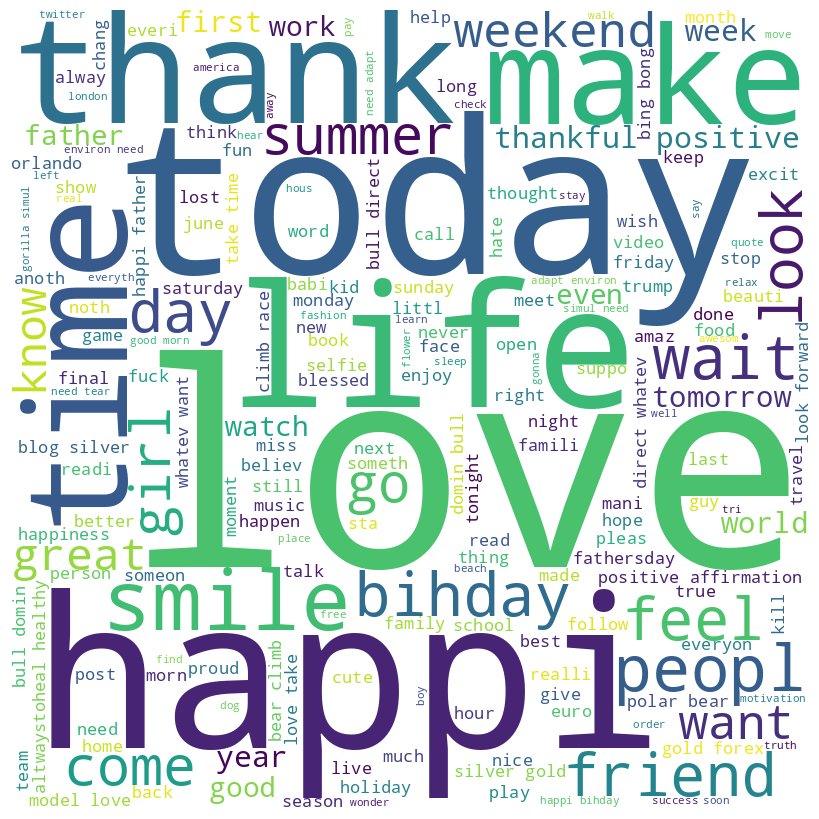

In [ ]:
# Generate WordCloud for positive tweets
all_positive_tweets_tokens = " ".join([i for i in df[df['label'] == 0]['clean_tweet']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_positive_tweets_tokens.replace("#", ""))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


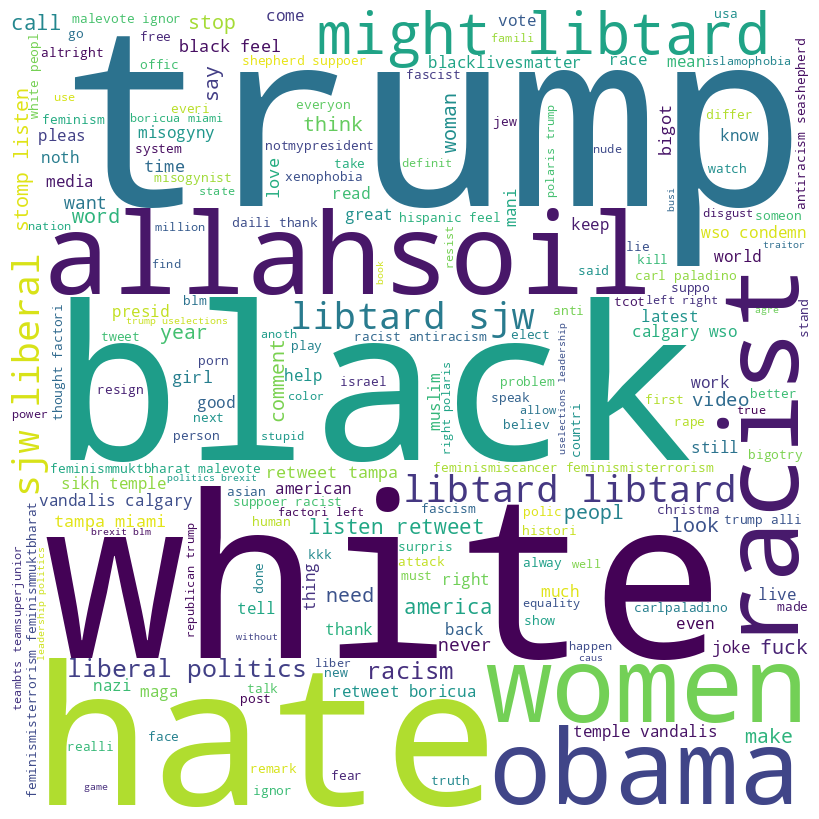

In [ ]:
# Generate WordCloud for negative tweets
all_negative_tweets_tokens = " ".join([i for i in df[df['label'] == 1]['clean_tweet']])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(all_negative_tweets_tokens.replace("#", ""))

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


In [ ]:
positive_hastags = [i for i in all_positive_tweets_tokens.split() if i.startswith("#")]
positive_hastags_count = {}

for the hashtag in positive_hastags:
    try:
        positive_hastags_count[hashtag] += 1
    except:
        positive_hastags_count[hashtag] = 1

positive_hastags_count = pd.DataFrame({'Hashtags':list(positive_hastags_count.keys()),'Count':list(positive_hastags_count.values())})

negative_hastags = [i for i in all_negative_tweets_tokens.split() if i.startswith("#")]
negative_hastags_count = {}

for the hashtag in negative_hastags:
    try:
        negative_hastags_count[hashtag] += 1
    except:
        negative_hastags_count[hashtag] = 1

negative_hastags_count = pd.DataFrame({'Hashtags':list(negative_hastags_count.keys()),'Count':list(negative_hastags_count.values())})

plt.figure(figsize = (12,6))
sns.barplot(data = positive_hastags_count.nlargest(10, columns = "Count"), y = 'Hashtags',x = 'Count')


SyntaxError: invalid syntax (<ipython-input-11-68aed952416b>, line 4)

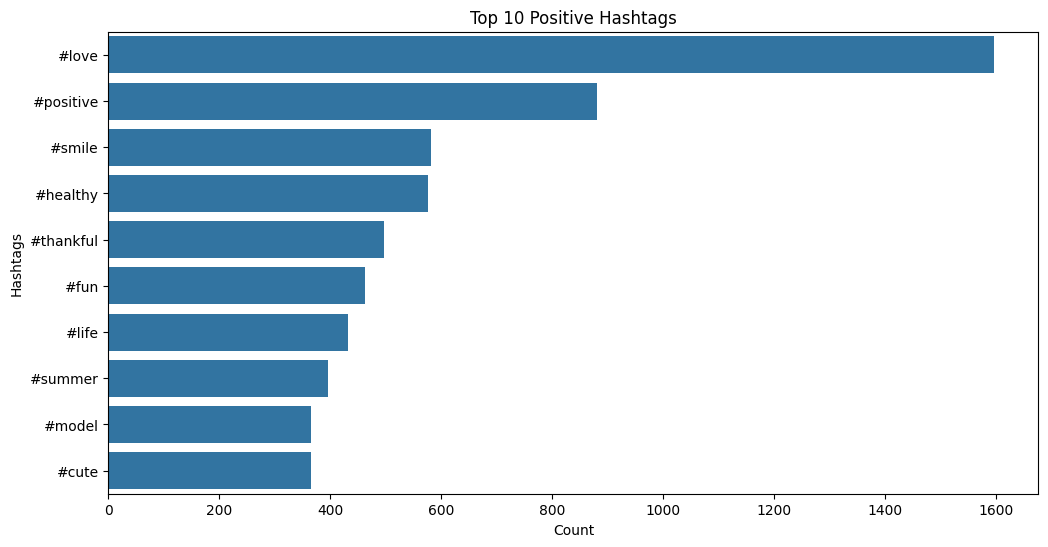

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming all_positive_tweets_tokens and all_negative_tweets_tokens are defined strings
positive_hastags = [i for i in all_positive_tweets_tokens.split() if i.startswith("#")]
positive_hastags_count = {}

for hashtag in positive_hastags:
    try:
        positive_hastags_count[hashtag] += 1
    except KeyError:
        positive_hastags_count[hashtag] = 1

positive_hastags_count = pd.DataFrame({
    'Hashtags': list(positive_hastags_count.keys()),
    'Count': list(positive_hastags_count.values())
})

negative_hastags = [i for i in all_negative_tweets_tokens.split() if i.startswith("#")]
negative_hastags_count = {}

for hashtag in negative_hastags:
    try:
        negative_hastags_count[hashtag] += 1
    except KeyError:
        negative_hastags_count[hashtag] = 1

negative_hastags_count = pd.DataFrame({
    'Hashtags': list(negative_hastags_count.keys()),
    'Count': list(negative_hastags_count.values())
})

# Plotting top 10 hashtags
plt.figure(figsize=(12, 6))
sns.barplot(data=positive_hastags_count.nlargest(10, columns="Count"), y='Hashtags', x='Count')
plt.title("Top 10 Positive Hashtags")
plt.show()


<Axes: xlabel='Count', ylabel='Hashtags'>

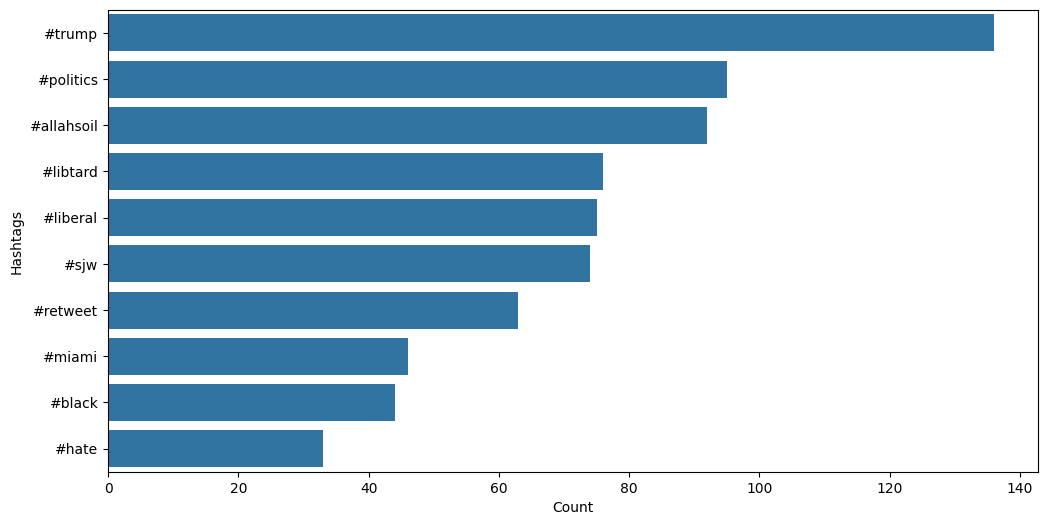

In [ ]:
plt.figure(figsize = (12,6))
sns.barplot(data = negative_hastags_count.nlargest(10, columns = "Count"), y = 'Hashtags',x = 'Count')


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Create features based on bag of words
bag_of_words_vectorizer = CountVectorizer()
df_bow = bag_of_words_vectorizer.fit_transform(df['clean_tweet'])

#Test - Train split
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(df_bow, df['label'], test_size = 0.2, random_state = 1234)

# Train Logistic Regression
logisitic_regressor = LogisticRegression(random_state = 0)
logisitic_regressor.fit(x_train_bow, y_train_bow)
>> LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

prediction_bow = logisitic_regressor.predict(x_test_bow)
logistic_f1_bow = f1_score(y_test_bow, prediction_bow)
logistic_precision_bow = precision_score(y_test_bow, prediction_bow)
logistic_f1_bow, logistic_precision_bow
>> (0.675177304964539, 0.8880597014925373)

# Train Decision Tree
decision_tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
decision_tree_classifier.fit(x_train_bow, y_train_bow)

prediction_bow = decision_tree_classifier.predict(x_test_bow)
dt_f1_bow = f1_score(y_test_bow, prediction_bow)
dt_precision_bow = precision_score(y_test_bow, prediction_bow)
dt_f1_bow, dt_precision_bow
>> (0.34296028880866425, 0.811965811965812)

# Train XGBoost
xgboost_classifier = XGBClassifier(n_estimators = 1000, learning_rate = 0.5, random_state = 1234, max_depth = 6)
xgboost_classifier.fit(x_train_bow, y_train_bow)
>> XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1234, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)


prediction_bow = xgboost_classifier.predict(x_test_bow)
xgboost_f1_bow = f1_score(y_test_bow, prediction_bow)
xgboost_precision_bow = precision_score(y_test_bow, prediction_bow)
xgboost_f1_bow, xgboost_precision_bow
>> (0.6487935656836461, 0.7831715210355987)


SyntaxError: invalid syntax (<ipython-input-14-5ac223b82e39>, line 19)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Create features based on bag of words
bag_of_words_vectorizer = CountVectorizer()
df_bow = bag_of_words_vectorizer.fit_transform(df['clean_tweet'])

# Test - Train split
x_train_bow, x_test_bow, y_train_bow, y_test_bow = train_test_split(df_bow, df['label'], test_size=0.2, random_state=1234)

# Train Logistic Regression
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(x_train_bow, y_train_bow)

# Make predictions and calculate metrics
prediction_bow = logistic_regressor.predict(x_test_bow)
logistic_f1_bow = f1_score(y_test_bow, prediction_bow)
logistic_precision_bow = precision_score(y_test_bow, prediction_bow)

print("Logistic Regression - F1 Score:", logistic_f1_bow)
print("Logistic Regression - Precision Score:", logistic_precision_bow)

# Train Decision Tree
decision_tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=1234)
decision_tree_classifier.fit(x_train_bow, y_train_bow)

# Make predictions and calculate metrics
prediction_bow = decision_tree_classifier.predict(x_test_bow)
dt_f1_bow = f1_score(y_test_bow, prediction_bow)
dt_precision_bow = precision_score(y_test_bow, prediction_bow)

print("Decision Tree - F1 Score:", dt_f1_bow)
print("Decision Tree - Precision Score:", dt_precision_bow)

# Train XGBoost
xgboost_classifier = XGBClassifier(n_estimators=1000, learning_rate=0.5, random_state=1234, max_depth=6)
xgboost_classifier.fit(x_train_bow, y_train_bow)

# Make predictions and calculate metrics
prediction_bow = xgboost_classifier.predict(x_test_bow)
xgboost_f1_bow = f1_score(y_test_bow, prediction_bow)
xgboost_precision_bow = precision_score(y_test_bow, prediction_bow)

print("XGBoost - F1 Score:", xgboost_f1_bow)
print("XGBoost - Precision Score:", xgboost_precision_bow)


Logistic Regression - F1 Score: 0.6742209631728046
Logistic Regression - Precision Score: 0.8847583643122676
Decision Tree - F1 Score: 0.34296028880866425
Decision Tree - Precision Score: 0.811965811965812
XGBoost - F1 Score: 0.6578249336870027
XGBoost - Precision Score: 0.7823343848580442


In [ ]:
# Create features based on TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(df['clean_tweet'])


#Test - Train split
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df_tfidf, df['label'], test_size = 0.2, random_state = 1234)

# Train Logistic Regression
logisitic_regressor = LogisticRegression(random_state = 0)
logisitic_regressor.fit(x_train_tfidf, y_train_tfidf)
>> LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

prediction_tfidf = logisitic_regressor.predict(x_test_tfidf)
logistic_f1_tfidf = f1_score(y_test_tfidf, prediction_tfidf)
logistic_precision_tfidf = precision_score(y_test_tfidf, prediction_tfidf)
logistic_f1_tfidf, logistic_precision_tfidf
>> (0.46048109965635736, 0.9241379310344827)

# Train Decision Tree
decision_tree_classifier = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
decision_tree_classifier.fit(x_train_tfidf, y_train_tfidf)

prediction_tfidf = decision_tree_classifier.predict(x_test_tfidf)
dt_f1_tfidf = f1_score(y_test_tfidf, prediction_tfidf)
dt_precision_tfidf = precision_score(y_test_tfidf, prediction_tfidf)
dt_f1_tfidf, dt_precision_tfidf
>> (0.4146730462519936, 0.6842105263157895)

# Train XGBoost
xgboost_classifier = XGBClassifier(n_estimators = 1000, learning_rate = 0.5, random_state = 1234, max_depth = 6)
xgboost_classifier.fit(x_train_tfidf, y_train_tfidf)
>> XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=8,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=1234, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

prediction_tfidf = xgboost_classifier.predict(x_test_tfidf)
xgboost_f1_tfidf = f1_score(y_test_tfidf, prediction_tfidf)
xgboost_precision_tfidf = precision_score(y_test_tfidf, prediction_tfidf)
xgboost_f1_tfidf, xgboost_precision_tfidf
>> (0.6469798657718121, 0.7824675324675324)


SyntaxError: invalid syntax (<ipython-input-16-b689b7e0a5c3>, line 13)

In [ ]:
# Create features based on TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Generate TFIDF features
tfidf = TfidfVectorizer()
df_tfidf = tfidf.fit_transform(df['clean_tweet'])

# Test - Train split
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df_tfidf, df['label'], test_size=0.2, random_state=1234)

# Train Logistic Regression
logistic_regressor = LogisticRegression(random_state=0)
logistic_regressor.fit(x_train_tfidf, y_train_tfidf)

# Make predictions and calculate metrics
prediction_tfidf = logistic_regressor.predict(x_test_tfidf)
logistic_f1_tfidf = f1_score(y_test_tfidf, prediction_tfidf)
logistic_precision_tfidf = precision_score(y_test_tfidf, prediction_tfidf)

print("Logistic Regression - F1 Score:", logistic_f1_tfidf)
print("Logistic Regression - Precision Score:", logistic_precision_tfidf)

# Train Decision Tree
decision_tree_classifier = DecisionTreeClassifier(max_depth=6, random_state=1234)
decision_tree_classifier.fit(x_train_tfidf, y_train_tfidf)

# Make predictions and calculate metrics
prediction_tfidf = decision_tree_classifier.predict(x_test_tfidf)
dt_f1_tfidf = f1_score(y_test_tfidf, prediction_tfidf)
dt_precision_tfidf = precision_score(y_test_tfidf, prediction_tfidf)

print("Decision Tree - F1 Score:", dt_f1_tfidf)
print("Decision Tree - Precision Score:", dt_precision_tfidf)

# Train XGBoost
xgboost_classifier = XGBClassifier(n_estimators=1000, learning_rate=0.5, random_state=1234, max_depth=6)
xgboost_classifier.fit(x_train_tfidf, y_train_tfidf)

# Make predictions and calculate metrics
prediction_tfidf = xgboost_classifier.predict(x_test_tfidf)
xgboost_f1_tfidf = f1_score(y_test_tfidf, prediction_tfidf)
xgboost_precision_tfidf = precision_score(y_test_tfidf, prediction_tfidf)

print("XGBoost - F1 Score:", xgboost_f1_tfidf)
print("XGBoost - Precision Score:", xgboost_precision_tfidf)


Logistic Regression - F1 Score: 0.45517241379310347
Logistic Regression - Precision Score: 0.9230769230769231
Decision Tree - F1 Score: 0.41467304625199364
Decision Tree - Precision Score: 0.6842105263157895
XGBoost - F1 Score: 0.6506024096385542
XGBoost - Precision Score: 0.7838709677419354
